## 1. Data Processing
## Here we are going to import and install all the necessary and required library packages 

In [1]:
!pip install lightgbm

In [2]:
import numpy as np
from sklearn.svm import SVR
import pandas as pd 
import seaborn as sns
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.linear_model import LinearRegression
import lightgbm as ltb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings('ignore')
# Import label encoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot

## checking data whether it is imported and loaded or not

In [3]:
df=pd.read_csv("CE802_P3_Data.csv")
df.tail()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
1495,90.80,9,65.28,Rest,-20.34,1534.28,957.56,-8.74,2.66,296.32,-260.19,6.24,11.24,12,Very high,1253.58,110.45
1496,79.23,3,2869.02,Europe,-9.21,1902.12,889.62,-12.52,8.72,275.64,-382.59,19.98,22.61,12,Very high,14809.94,2672.58
1497,72.74,3,22.08,Rest,-22.83,1720.91,294.80,-11.67,8.58,294.39,-469.68,6.06,17.10,16,Very high,7310.66,1722.09
1498,87.16,12,4.32,Europe,-8.43,1213.86,1526.42,-13.21,3.60,236.67,-335.64,20.40,22.14,10,Low,15269.16,323.48
1499,95.52,21,0.63,USA,-18.72,1122.09,1321.72,-11.73,3.74,275.92,-419.70,66.48,19.93,2,Very low,18033.58,3591.35


In [4]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,61.22,6,0.00,UK,-14.91,1030.95,614.70,-8.40,11.96,275.99,-333.60,1.86,19.48,6,Very high,7841.50,1605.31
1,86.58,12,20.07,Europe,0.57,1059.87,1354.00,-9.97,3.80,347.10,-356.04,6.39,22.15,2,Very low,25589.98,0.00
2,75.95,6,45.00,USA,-1.29,1320.03,1477.96,-10.02,20.32,345.69,-353.58,13.14,21.87,8,Low,16849.14,3241.77
3,156.57,12,12.93,USA,-4.83,1696.92,750.14,-10.98,4.78,253.37,-254.37,15.48,28.11,10,Very low,10791.06,0.00
4,101.27,3,0.51,Rest,-26.28,1451.37,251.06,-9.71,2.06,242.35,-379.77,3.90,23.84,10,Very low,14760.66,336.25


### dataframe shape

In [5]:
df.shape

(1500, 17)

### checking null values in data if there's any

In [6]:
df.isnull().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
Target    0
dtype: int64

## 2. Exploratory data analysis

### Here I have used the pie chart to show the feature F15’s distribution

Very low     312
Low          310
High         301
Very high    290
Medium       287
Name: F15, dtype: int64


Text(0.5, 0, 'F15')

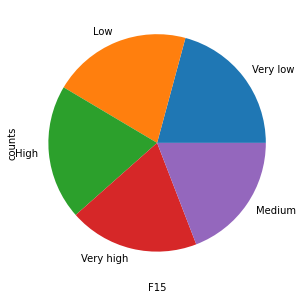

In [7]:
print(df['F15'].value_counts())
plt.figure(figsize=(10,5))
df['F15'].value_counts(normalize=True).plot(kind='pie')
plt.ylabel('counts')
plt.xlabel('F15')

USA       407
Europe    380
Rest      360
UK        353
Name: F4, dtype: int64


Text(0.5, 0, 'F4')

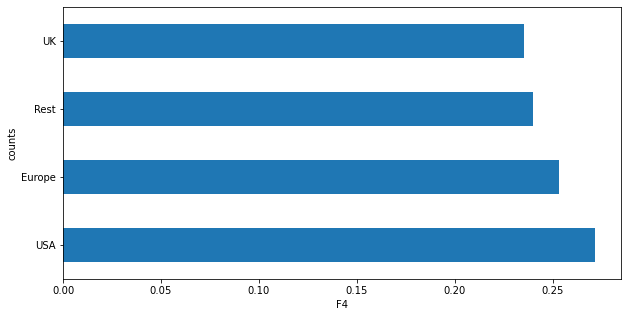

In [8]:
print(df['F4'].value_counts())
plt.figure(figsize=(10,5))
df['F4'].value_counts(normalize=True).plot(kind='barh')
plt.ylabel('counts')
plt.xlabel('F4')

### checking target amount with different volumes

<AxesSubplot:xlabel='Target', ylabel='F15'>

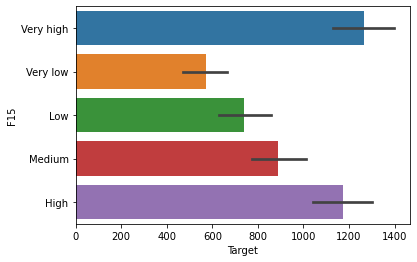

In [9]:
sns.barplot(x='Target',y='F15',data=df)

In [10]:
print(df["Target"].unique())

[1605.31    0.   3241.77 ... 1722.09  323.48 3591.35]


### We can clearly see that US has a high diabetic patient than any other countries because their medicine intake is high

<AxesSubplot:xlabel='F4', ylabel='count'>

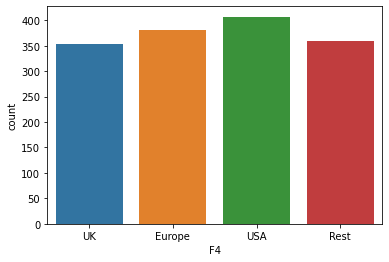

In [11]:
sns.countplot(x="F4", data=df)

### checking how our features are correlated to each other

In [12]:
corrdata = df.corr()

<AxesSubplot:>

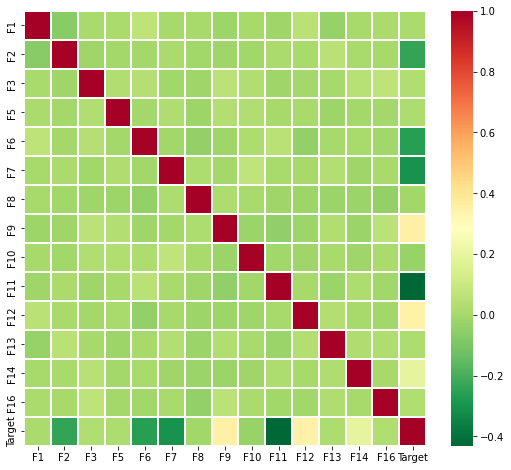

In [13]:
corrmat = df.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="RdYlGn_r", linewidths = 0.1)

## Now we are starting to build our model

## we will focuse on the algorithms stated below


### 1. Linear regression
### 2. LightGBM
### 3. Extra tree regression
### 4. Suppport vector machine



In [14]:
# label encoding our column.
label_encoder = preprocessing.LabelEncoder()
df['F15']= label_encoder.fit_transform(df['F15'])

<AxesSubplot:xlabel='F15', ylabel='Count'>

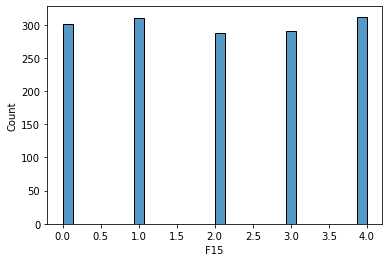

In [15]:
sns.histplot(df['F15'],bins=30)  

### Generating  dummies from the country variable

In [16]:
df=pd.get_dummies(df, columns=['F4'])

### checking our data after generating dummies

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   F1         1500 non-null   float64
 1   F2         1500 non-null   int64  
 2   F3         1500 non-null   float64
 3   F5         1500 non-null   float64
 4   F6         1500 non-null   float64
 5   F7         1500 non-null   float64
 6   F8         1500 non-null   float64
 7   F9         1500 non-null   float64
 8   F10        1500 non-null   float64
 9   F11        1500 non-null   float64
 10  F12        1500 non-null   float64
 11  F13        1500 non-null   float64
 12  F14        1500 non-null   int64  
 13  F15        1500 non-null   int32  
 14  F16        1500 non-null   float64
 15  Target     1500 non-null   float64
 16  F4_Europe  1500 non-null   uint8  
 17  F4_Rest    1500 non-null   uint8  
 18  F4_UK      1500 non-null   uint8  
 19  F4_USA     1500 non-null   uint8  
dtypes: float

In [18]:
#defining our algorithms
svector = SVR(kernel="linear")
light = ltb.LGBMRegressor()
linear  =  LinearRegression()
extree = ExtraTreesRegressor()

In [19]:
scaler=StandardScaler()#Standardize features

## Splitting our data into two parts train and test 
### with 80:20 ratio

In [20]:
X= df[df.columns[:-1]]
y = df[df.columns[-1]]

scaled = scaler.fit_transform(X)

## LinearRegression

In [21]:
x_train, x_val, y_train, y_val = train_test_split(scaled,y,test_size=0.25,random_state=42)

#### Training the model using t linear regression

In [22]:
linear.fit(x_train, y_train)
y_test = linear.predict(x_val)

In [23]:
# Model Evaluation
linear_mse = metrics.mean_squared_error(y_val, y_test)
linear_mse

3.0128734468675412e-31

Feature: 0, Score: -0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: -0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: -0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: -0.00000
Feature: 10, Score: -0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: -0.43492
Feature: 17, Score: -0.42708
Feature: 18, Score: -0.42421


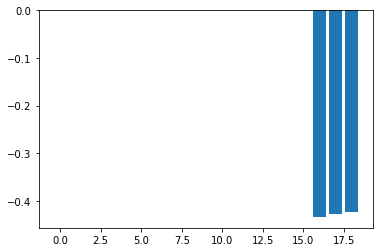

In [24]:
# get importance
importance = linear.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## LightGBM Regressor

In [25]:
light.fit(x_train, y_train)
y_test= light.predict(x_val)

In [26]:
# Model Evaluation
light_mse = metrics.mean_squared_error(y_val, y_test)
light_mse 


0.0015234990553690607

## Extra tree Regressor

In [27]:
extree.fit(x_train, y_train)
y_test= extree.predict(x_val)

In [28]:
# Model Evaluation
extree_mse= metrics.mean_squared_error(y_val, y_test)
extree_mse


0.0

## Support vector

In [29]:
svector.fit(x_train, y_train)

y_test = svector.predict(x_val)

In [30]:
# Model Evaluation
svector_mse = metrics.mean_squared_error(y_val, y_test)
svector_mse


0.009965710833039999

In [31]:
Algorithms = pd.DataFrame({'Type_algo': ['Linear Regression', 'LightGBM', 'Etra tree', 'Support Vector'],'MSE': [linear_mse, light_mse, extree_mse, svector_mse]})


In [32]:
Algorithms

,Type_algo,MSE
0,Linear Regression,3.012873e-31
1,LightGBM,1.523499e-03
2,Etra tree,0.000000e+00
3,Support Vector,9.965711e-03


In [33]:
Algorithms.sort_values(by='MSE', ascending=False)

,Type_algo,MSE
3,Support Vector,9.965711e-03
1,LightGBM,1.523499e-03
0,Linear Regression,3.012873e-31
2,Etra tree,0.000000e+00


### Linear Regression outperformed the rest algorithms while svm performed poorly
### All other strategies were exceeded by linear regression, making it the ideal option for forecasting hold test results.

## Final Results

## Using Linear regression it to predict out Hold out Test data

In [35]:
#loading our test data
data_test=pd.read_csv("CE802_P3_Test.csv")
data_test.head()


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,154.97,9,0.57,USA,-14.34,1286.94,1913.38,-10.54,6.66,232.40,-440.10,12.51,22.99,4,Low,22482.82,NaN
1,78.99,6,2.31,USA,-16.17,1522.99,1458.10,-12.17,4.96,268.26,-328.74,21.03,20.80,12,High,17183.76,NaN
2,115.81,6,0.24,UK,6.84,979.23,1427.52,-11.22,4.74,233.43,-404.07,1.17,21.42,6,Very high,17585.36,NaN
3,48.99,9,1023.63,Rest,-12.75,1052.18,605.80,-9.75,11.46,261.27,-506.25,3.99,19.64,4,High,14621.10,NaN
4,71.39,6,1.68,Europe,-10.98,1235.64,-208.92,-11.45,12.76,332.18,-196.89,25.35,19.50,8,Medium,14624.56,NaN


#### creating a copy of test that we will be retaine for adding our prediction

In [36]:
Testt=data_test.copy()

In [37]:
# Encode labels in column 'species'.
data_test['F15']= label_encoder.fit_transform(data_test['F15'])
# generating dummy variables from the country 
data_test=pd.get_dummies(data_test, columns=['F4'])

In [38]:
data_test.sample(4)

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target,F4_Europe,F4_Rest,F4_UK,F4_USA
172,119.14,15,0.63,2.61,1667.24,1433.08,-11.33,0.18,241.58,-253.26,11.37,15.99,8,4,26663.74,NaN,1,0,0,0
1063,88.98,12,6.03,-11.37,2015.06,2177.80,-12.52,6.14,282.39,-213.72,1.86,21.57,4,2,12916.38,NaN,1,0,0,0
103,133.50,21,0.72,-2.58,1072.73,748.78,-12.52,11.52,254.13,-527.67,8.82,21.53,10,4,6479.44,NaN,0,1,0,0
956,90.11,3,2.31,-1.98,1509.71,68.06,-9.87,2.18,219.43,-327.03,7.56,22.63,8,4,15042.28,NaN,0,0,0,1


#### we must drop the Uknown class so that we can predict 

In [39]:
data_test_features= data_test.drop(['Target'], axis = 1)

In [40]:
data_test_features.tail(4)

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F4_Europe,F4_Rest,F4_UK,F4_USA
1496,135.11,18,10.14,2.61,390.34,1181.84,-12.15,11.80,224.01,-272.79,9.15,22.21,6,2,19004.04,0,0,0,1
1497,89.74,6,15.21,-23.97,1745.60,1240.02,-5.13,1.68,272.01,-331.17,21.99,20.91,10,4,15545.40,1,0,0,0
1498,69.63,24,0.15,-2.28,1764.78,1448.96,-13.66,3.24,197.32,-243.57,2.67,17.72,10,1,19250.20,0,0,0,1
1499,67.93,12,4.50,-3.27,1060.63,1378.76,-7.92,9.42,208.50,-355.41,5.46,25.12,4,4,14696.28,0,1,0,0


In [41]:
linear.fit(x_train, y_train)
predictions = linear.predict(data_test_features)

#### Replace the Target columns with our predictions

In [42]:
Testt['Target']= predictions

In [43]:
Testt.shape

(1500, 17)

In [44]:
Testt.tail()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
1495,58.13,12,22.05,UK,2.13,1014.70,567.18,-11.91,2.58,266.94,-181.02,12.93,12.35,8,Very high,17222.30,-0.155750
1496,135.11,18,10.14,USA,2.61,390.34,1181.84,-12.15,11.80,224.01,-272.79,9.15,22.21,6,Medium,19004.04,-0.152874
1497,89.74,6,15.21,Europe,-23.97,1745.60,1240.02,-5.13,1.68,272.01,-331.17,21.99,20.91,10,Very low,15545.40,0.271333
1498,69.63,24,0.15,USA,-2.28,1764.78,1448.96,-13.66,3.24,197.32,-243.57,2.67,17.72,10,Low,19250.20,-0.152874
1499,67.93,12,4.50,Rest,-3.27,1060.63,1378.76,-7.92,9.42,208.50,-355.41,5.46,25.12,4,Very low,14696.28,-0.163587


In [45]:
#generating new test set dataframe
data_test.to_csv('CE802_P3_Test.csv', index = False)